In [1]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# FERMI DATA

In [2]:
from DynGenModels.models.mlp import MLP
from DynGenModels.configs.fermi_configs import FermiMLPConfig

#...define hyperparameters:

configs = FermiMLPConfig(dataset = '../data/fermi/fermi_data_galactic_coord.npy',
                        features = ['theta', 'phi', 'energy'],
                        preprocess = ['normalize', 'logit_transform', 'standardize'],
                        cuts = {'theta': [-20., 20.], 'phi': [4., 10.], 'energy': [1000, 2000]},
                        sigma = 0.0,
                        data_split_fracs = [0.6, 0.1, 0.3],
                        epochs = 10,
                        early_stopping=100,
                        batch_size = 512,
                        warmup_epochs = 100,
                        lr = 1e-3,
                        dim_hidden = 512, 
                        device = 'cpu',
                        solver='euler',
                        num_sampling_steps=50,
                        seed = 12345
                        )

#...run experiment:

from DynGenModels.datamodules.fermi.datasets import FermiDataset
from DynGenModels.datamodules.fermi.dataprocess import PostProcessFermiData
from DynGenModels.datamodules.fermi.dataloader import FermiDataLoader
from DynGenModels.dynamics.flowmatch import SimplifiedCondFlowMatching
from DynGenModels.pipelines.FlowMatchPipeline import FlowMatchPipeline
from DynGenModels.pipelines.utils import RunFlowPipeline

fermi = RunFlowPipeline(workdir='../results',
                        dataset=FermiDataset,
                        dataloader=FermiDataLoader,
                        net=MLP,
                        configs=configs,
                        dynamics=SimplifiedCondFlowMatching,
                        pipeline=FlowMatchPipeline,
                        postprocessor=PostProcessFermiData
                        )  

#=================================================================================
INFO: created directory: ../results/MLP.fermi_galactic_center_2023.09.26_20h50__1
#=================================================================================
+--------------------+-------------------------------------------------+
| Key                | Value                                           |
+--------------------+-------------------------------------------------+
| dataset            | ../data/fermi/fermi_data_galactic_coord.npy     |
| data_name          | fermi_galactic_center                           |
| features           | ['theta', 'phi', 'energy']                      |
| preprocess         | ['normalize', 'logit_transform', 'standardize'] |
| cuts               | theta: [-20.0, 20.0]                            |
|                    | phi: [4.0, 10.0]                                |
|                    | energy: [1000, 2000]                            |
| device             |

epochs:   0%|          | 0/10 [00:00<?, ?it/s]

	 test loss: 0.0030807529734074223  (min loss: 0.0030807529734074223)


sampling:   0%|          | 0/114 [00:00<?, ?it/s]

/Users/dario/anaconda3/lib/python3.10/site-packages/torchdyn/numerics/odeint.py:84: UserWarning: Setting tolerances has no effect on fixed-step methods
  warn("Setting tolerances has no effect on fixed-step methods")


INFO: post-processing sampled data with ['inverse_standardize', 'inverse_logit_transform', 'inverse_normalize']


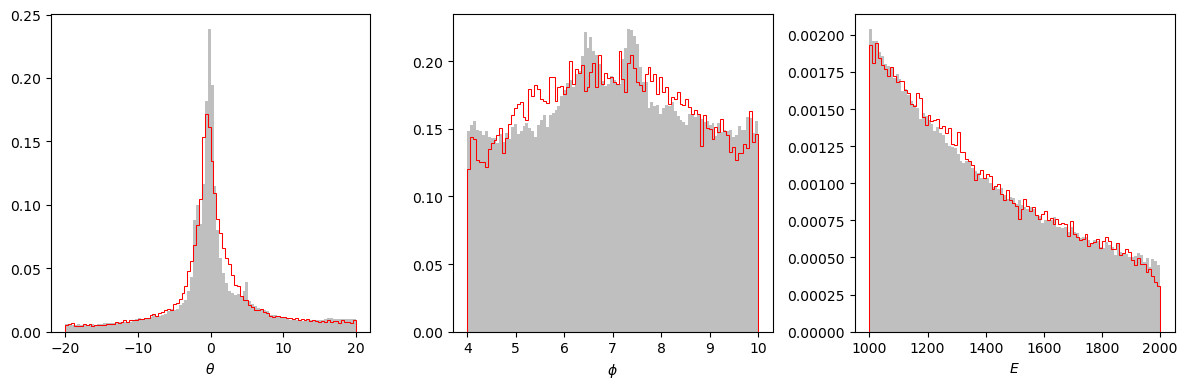

In [4]:


# bin_steps = 50
# bins = np.linspace(-1, 1, bin_steps)

bins=100 
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].hist(x=fermi.target[:,0], color='r', bins=bins, histtype='step', lw=0.75, density=True)
ax[0].hist(x=fermi.dataset.target[:,0], color='k', bins=bins, histtype='stepfilled', alpha=0.25, lw=0, density=True)

ax[1].hist(x=fermi.target[:,1], color='r', bins=bins, histtype='step', lw=0.75, density=True)
ax[1].hist(x=fermi.dataset.target[:,1], color='k', bins=bins, histtype='stepfilled', alpha=0.25, lw=0, density=True)

ax[2].hist(x=fermi.target[:,2], color='r', bins=bins, histtype='step', lw=0.75, density=True)
ax[2].hist(x=fermi.dataset.target[:,2], color='k', bins=bins, histtype='stepfilled', alpha=0.25, lw=0,density=True)

ax[0].set_xlabel(r'$\theta$')
ax[1].set_xlabel(r'$\phi$')
ax[2].set_xlabel(r'$E$')
plt.tight_layout()
plt.show()
